In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")
execute_notebook("../../bin/plotting.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


Thresholding the inclusion of mutations based on their allelic fraction in patients <br>
The current threshold is removing those below the 25 percentile cutoff

Pan analysis

In [2]:
classes = ['class_i', 'class_ii']
all_dfs = []
for c in classes:
    for f, name in zip(['cancer.thresh_2.txt', 'conservative.thresh_2.txt'],
                       ['Inclusive Patients', 'Conservative Patients']): 
        tmp = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/pan/{0}/{1}'.format(c, f),
               sep=' ')
        tmp['Class'] = c
        tmp['Condition'] = name
        all_dfs.append(tmp)
pan = pd.concat(all_dfs)

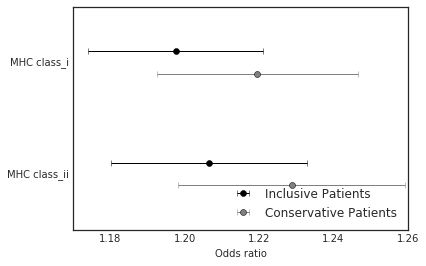

In [3]:
plot = plot_pan_comparison(pan, 'Condition', 
                           '/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/conservative_hla_typing.pan_OR.pdf')

Tissue analysis

In [4]:
df1 = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/class_ii/cancer.thresh_2.txt',
           sep=',')
df2 = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/class_ii/conservative.thresh_2.txt',
           sep=',')

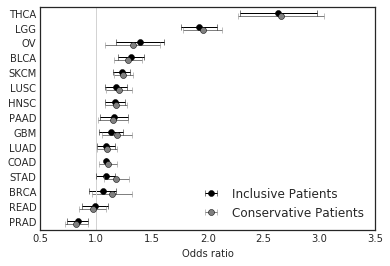

In [6]:
ax = plot_tissue_comparison(df1, df2, 'Inclusive Patients', 'Conservative Patients',
                            '/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/conservative_hla_typing.classII_OR.pdf')